In [1]:
import os
from os.path import expanduser
home = expanduser("~/")

import sys
# sys.path.insert(0, '/global/u2/x/xshuang/gigalens-xh-dev/src')
sbalta01_dev = False

if sbalta01_dev:
    sys.path.insert(0, home+'/gigalens-sbalta01-dev'+'/src')
    print('DEVELOPER MODE')

else:
    sys.path.insert(0, home+'/gigalens'+'/src')
    print('MASTER BRANCH GIGALENS')

srcdir = os.path.join(home, "gigalens/src/")

import jax
print(jax.devices())

MASTER BRANCH GIGALENS
[StreamExecutorGpuDevice(id=0, process_index=0, slice_index=0), StreamExecutorGpuDevice(id=1, process_index=0, slice_index=0), StreamExecutorGpuDevice(id=2, process_index=0, slice_index=0), StreamExecutorGpuDevice(id=3, process_index=0, slice_index=0)]


In [2]:
from gigalens.jax.inference import ModellingSequence
from gigalens.jax.model import ForwardProbModel, BackwardProbModel
from gigalens.model import PhysicalModel
from gigalens.jax.simulator import LensSimulator
from gigalens.simulator import SimulatorConfig
from gigalens.jax.profiles.light import sersic
from gigalens.jax.profiles.mass import epl, shear

import tensorflow_probability.substrates.jax as tfp
import jax
from jax import random
import numpy as np
import optax
from jax import numpy as jnp
from matplotlib import pyplot as plt
import optax
import corner
# import pickle
tfd = tfp.distributions
jax.devices()

/global/common/software/deepsrch/jax_gigalens_kernel/jax-gigalens/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[StreamExecutorGpuDevice(id=0, process_index=0, slice_index=0),
 StreamExecutorGpuDevice(id=1, process_index=0, slice_index=0),
 StreamExecutorGpuDevice(id=2, process_index=0, slice_index=0),
 StreamExecutorGpuDevice(id=3, process_index=0, slice_index=0)]

In [3]:
f = np.load("FourArchetypal-SVINAN.npz")
keys = f.files
observed_img_nan = jnp.array([f[key] for key in keys])[0]

f = np.load("FourArchetypal-NoSVINAN.npz")
keys = f.files
observed_img = jnp.array([f[key] for key in keys])[0]

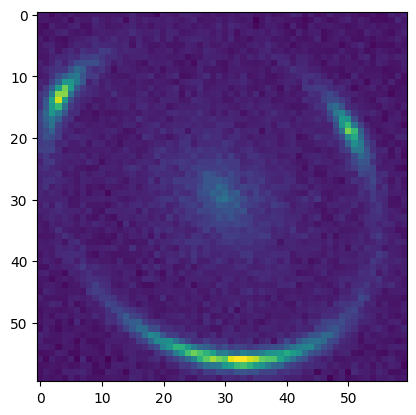

In [4]:
plt.imshow(observed_img_nan)

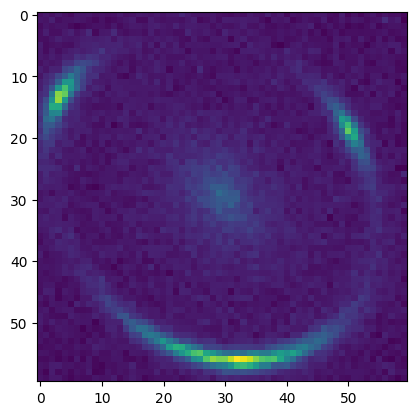

In [5]:
plt.imshow(observed_img)

In [7]:
np.sum(np.isnan(observed_img_nan))

0